In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e2036ef1-c497-43be-87fd-0a74eeb42b22',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-16T06:26:04.678Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8865}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9931, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-01-16T06:26:04.678Z,0,None,18,1,None,8865


In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') # Add a column to the dataframe which shows the time of the pull
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9931,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.926371e+07,1.926371e+07,NaN,1,NaN,NaN,None,2023-01-16T06:24:00.000Z,21178.908164,2.186670e+10,-23.0323,0.103912,2.035319,23.043558,26.797486,27.577911,8.251790,4.079843e+11,40.9328,4.447571e+11,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
1,1027,Ethereum,ETH,ethereum,6359,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-16T06:24:00.000Z,1574.415269,7.112889e+09,-24.0225,0.111008,3.046943,20.351916,33.770916,29.710475,18.023690,1.926673e+11,19.3240,1.926673e+11,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
2,825,Tether,USDT,tether,46144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.635539e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-16T06:24:00.000Z,1.000367,3.206134e+10,-21.2432,-0.003587,0.020654,0.034927,0.020392,0.096929,0.030801,6.637976e+10,6.6583,7.316863e+10,None,2023-01-16T06:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-16 06:26:37.971211
3,1839,BNB,BNB,bnb,1168,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599620e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-01-16T06:24:00.000Z,305.061595,5.500010e+08,-31.6518,-0.224281,2.200657,9.588576,33.526779,12.664605,11.149064,4.879825e+10,4.8948,6.101232e+10,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
4,3408,USD Coin,USDC,usd-coin,9549,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.394281e+10,4.394281e+10,NaN,5,NaN,NaN,None,2023-01-16T06:24:00.000Z,1.000005,2.714547e+09,-20.8950,0.001668,0.010101,0.000824,0.009568,-0.029585,-0.007789,4.394302e+10,4.4074,4.394302e+10,None,2023-01-16T06:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-16 06:26:37.971211


In [7]:
# Defining a function which will pull the contents of the api
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e2036ef1-c497-43be-87fd-0a74eeb42b22',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    # If there is no file called API.csv, this will create it
    # If the file exists, else statement contents will append the contents of the
    # dataframe to the csv and remove the headers
    if not os.path.isfile(r'C:\Users\anant\Desktop\Personal Projects\Crypto API\API.csv'):
        df.to_csv(r'C:\Users\anant\Desktop\Personal Projects\Crypto API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\anant\Desktop\Personal Projects\Crypto API\API.csv', mode = 'a', header = False)

In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner succesful')
    sleep(60) # Run this loop and call the function every 60 seconds
exit()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner succesful
API runner succesful


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [9]:
df3 = pd.read_csv(r'C:\Users\anant\Desktop\Personal Projects\Crypto API\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.916645e+07,1.916645e+07,NaN,1,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,19304.084310,1.850754e+10,-57.5138,-0.027180,-0.747112,1.849271,-3.919297,-15.532260,0.080581,3.699908e+11,39.5219,4.053858e+11,NaN,2022-10-02T00:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-02 00:33:51.833267
1,1,1027,Ethereum,ETH,ethereum,6116,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.226126e+08,1.226126e+08,NaN,2,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,1313.042873,6.173599e+09,-56.1718,0.095916,-1.406983,-0.415080,-16.865440,-18.407616,22.394571,1.609957e+11,17.1924,1.609957e+11,NaN,2022-10-02T00:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-02 00:33:51.833267
2,2,825,Tether,USDT,tether,40396,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.794942e+10,7.015545e+10,NaN,3,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,1.000037,2.709760e+10,-50.4371,-0.001253,-0.000843,-0.001198,0.000581,-0.014487,0.100162,6.795191e+10,7.2564,7.015801e+10,NaN,2022-10-02T00:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-02 00:33:51.833267
3,3,3408,USD Coin,USDC,usd-coin,6413,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.725703e+10,4.725703e+10,NaN,4,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,1.000258,3.102803e+09,-36.0212,0.030288,0.027087,0.023969,0.036903,0.052916,0.024824,4.726920e+10,5.0478,4.726920e+10,NaN,2022-10-02T00:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-02 00:33:51.833267
4,4,1839,BNB,BNB,bnb,1119,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,283.086637,5.875121e+08,-34.9780,0.091212,-0.603885,3.138610,1.984777,0.774090,29.217220,4.567242e+10,4.8787,5.661733e+10,NaN,2022-10-02T00:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-02 00:33:51.833267
5,5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.990067e+10,9.998929e+10,NaN,6,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,0.476376,1.517053e+09,-62.4659,0.396144,-0.313436,-2.004966,43.625174,29.027408,47.533666,2.377146e+10,2.5392,4.763756e+10,NaN,2022-10-02T00:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-02 00:33:51.833267
6,6,4687,Binance USD,BUSD,binance-usd,5207,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,1.000729,4.444655e+09,-38.1337,0.051069,0.081949,0.060592,0.061239,0.069242,0.150217,2.105756e+10,2.2487,2.105756e+10,NaN,2022-10-02T00:32:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-02 00:33:51.833267
7,7,2010,Cardano,ADA,cardano,576,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.425317e+10,3.496950e+10,NaN,8,NaN,NaN,NaN,2022-10-02T00:32:00.000Z,0.430821,3.125707e+08,-43.5267,0.078054,-1.151228,-4.778365,-5.717105,-12.583527,-5.419143,1.475697e+10,1.5759,1.938692e+10,NaN,2022-10-02T00:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-02 00:33:51.833267
8,8,5426,Solana,SOL,solana,388,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.552842e+08,5.116169e+08,NaN

In [10]:
# Change the digits from scientific notation to float
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9931,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19263706.00000,19263706.00000,NaN,1,NaN,NaN,None,2023-01-16T06:24:00.000Z,21178.90816,21866697060.16031,-23.03230,0.10391,2.03532,23.04356,26.79749,27.57791,8.25179,407984260268.53687,40.93280,444757071439.90002,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
1,1027,Ethereum,ETH,ethereum,6359,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-16T06:24:00.000Z,1574.41527,7112888856.62500,-24.02250,0.11101,3.04694,20.35192,33.77092,29.71048,18.02369,192667283489.45749,19.32400,192667283489.45999,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
2,825,Tether,USDT,tether,46144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66355388816.45820,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-16T06:24:00.000Z,1.00037,32061337517.99366,-21.24320,-0.00359,0.02065,0.03493,0.02039,0.09693,0.03080,66379761217.02235,6.65830,73168631365.03000,None,2023-01-16T06:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-16 06:26:37.971211
3,1839,BNB,BNB,bnb,1168,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159961951.63701,159979963.59043,NaN,4,NaN,NaN,None,2023-01-16T06:24:00.000Z,305.06160,550000984.73621,-31.65180,-0.22428,2.20066,9.58858,33.52678,12.66461,11.14906,48798248113.18544,4.89480,61012319009.36000,None,2023-01-16T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 06:26:37.971211
4,3408,USD Coin,USDC,usd-coin,9549,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43942813080.48326,43942813080.48326,NaN,5,NaN,NaN,None,2023-01-16T06:24:00.000Z,1.00000,2714547158.81050,-20.89500,0.00167,0.01010,0.00082,0.00957,-0.02959,-0.00779,43943019567.66319,4.40740,43943019567.66000,None,2023-01-16T06:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-16 06:26:37.971211


In [12]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10391,2.03532,23.04356,26.79749,27.57791,8.25179
Ethereum,0.11101,3.04694,20.35192,33.77092,29.71048,18.02369
Tether,-0.00359,0.02065,0.03493,0.02039,0.09693,0.03080
BNB,-0.22428,2.20066,9.58858,33.52678,12.66461,11.14906
USD Coin,0.00167,0.01010,0.00082,0.00957,-0.02959,-0.00779
XRP,0.20847,3.49823,14.58214,14.08864,5.16953,-15.39588
Binance USD,0.04452,0.05206,0.02134,0.05016,-0.05735,0.06762
Cardano,-0.30474,3.75572,10.28891,37.95674,9.30259,-2.67570
Dogecoin,0.22397,2.41514,15.90000,12.31317,1.67465,45.31949


In [13]:
# Stacking will change the dataframe into a series data type
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.10391
             quote.USD.percent_change_24h     2.03532
             quote.USD.percent_change_7d     23.04356
             quote.USD.percent_change_30d    26.79749
             quote.USD.percent_change_60d    27.57791
             quote.USD.percent_change_90d     8.25179
Ethereum     quote.USD.percent_change_1h      0.11101
             quote.USD.percent_change_24h     3.04694
             quote.USD.percent_change_7d     20.35192
             quote.USD.percent_change_30d    33.77092
             quote.USD.percent_change_60d    29.71048
             quote.USD.percent_change_90d    18.02369
Tether       quote.USD.percent_change_1h     -0.00359
             quote.USD.percent_change_24h     0.02065
             quote.USD.percent_change_7d      0.03493
             quote.USD.percent_change_30d     0.02039
             quote.USD.percent_change_60d     0.09693
             quote.USD.percent_change_90

In [14]:
# Converting series data type back to a dataframe
df6 = df5.to_frame(name = 'values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.10391
            quote.USD.percent_change_24h   2.03532
            quote.USD.percent_change_7d   23.04356
            quote.USD.percent_change_30d  26.79749
            quote.USD.percent_change_60d  27.57791
            quote.USD.percent_change_90d   8.25179
Ethereum    quote.USD.percent_change_1h    0.11101
            quote.USD.percent_change_24h   3.04694
            quote.USD.percent_change_7d   20.35192
            quote.USD.percent_change_30d  33.77092
            quote.USD.percent_change_60d  29.71048
            quote.USD.percent_change_90d  18.02369
Tether      quote.USD.percent_change_1h   -0.00359
            quote.USD.percent_change_24h   0.02065
            quote.USD.percent_change_7d    0.03493
            quote.USD.percent_change_30d   0.02039
            quote.USD.percent_change_60d   0.09693
            quote.USD.percent_change_90d   0.03080
BNB         quote.USD.percent_change_1h   -0.22428
            quote.USD.percent_change_24h   2.20066
            quote.USD.percent_change_7d    9.58858
            quote.USD.percent_change_30d  33.52678
            quote.USD.percent_change_60d  12.66461
            quote.USD.percent_change_90d  11.14906
USD Coin    quote.USD.percent_change_1h    0.00167
            quote.USD.percent_change_24h   0.01010
            quote.USD.percent_change_7d    0.00082
            quote.USD.percent_change_30d   0.00957
            quote.USD.percent_change_60d  -0.02959
            quote.USD.percent_change_90d  -0.00779
XRP         quote.USD.percent_change_1h    0.20847
            quote.USD.percent_change_24h   3.49823
            quote.USD.percent_change_7d   14.58214
            quote.USD.percent_change_30d  14.08864
            quote.USD.percent_change_60d   5.16953
            quote.USD.percent_change_90d -15.39588
Binance USD quote.USD.percent_change_1h    0.04452
            quote.USD.percent_change_24h   0.05206
            quote.USD.percent_change_7d    0.02134
            quote.USD.percent_change_30d   0.05016
            quote.USD.percent_change_60d  -0.05735
            quote.USD.percent_change_90d   0.06762
Cardano     quote.USD.percent_change_1h   -0.30474
            quote.USD.percent_change_24h   3.75572
            quote.USD.percent_change_7d   10.28891
            quote.USD.percent_change_30d  37.95674
            quote.USD.percent_change_60d   9.30259
            quote.USD.percent_change_90d  -2.67570
Dogecoin    quote.USD.percent_change_1h    0.22397
            quote.USD.percent_change_24h   2.41514
            quote.USD.percent_change_7d   15.90000
            quote.USD.percent_change_30d  12.31317
            quote.USD.percent_change_60d   1.67465
            quote.USD.percent_change_90d  45.31949
Polygon     quote.USD.percent_change_1h    0.36298
            quote.USD.percent_change_24h   5.95203
            quote.USD.percent_change_7d   20.36665
            quote.USD.percent_change_30d  27.78706
            quote.USD.percent_change_60d  16.51561
            quote.USD.percent_change_90d  17.77278
Solana      quote.USD.percent_change_1h    0.49547
            quote.USD.percent_change_24h   2.38019
            quote.USD.percent_change_7d   45.26815
            quote.USD.percent_change_30d  91.78291
            quote.USD.percent_change_60d  63.25342
            quote.USD.percent_change_90d -24.40158
Polkadot    quote.USD.percent_change_1h    0.39809
            quote.USD.percent_change_24h   2.28745
            quote.USD.percent_change_7d   22.42814
            quote.USD.percent_change_30d  29.05142
            quote.USD.percent_change_60d   5.59288
            quote.USD.percent_change_90d  -3.60679
Litecoin    quote.USD.percent_change_1h    0.01161
            quote.USD.percent_change_24h   1.01629
            quote.USD.percent_change_7d    6.97870
            quote.USD.percent_change_30d  37.89174
            quote.USD.percent_change_60d  51.89896
            quo

In [15]:
count = df6.count()
count

values    90
dtype: int64

In [16]:
type(count)

pandas.core.series.Series

In [17]:
index = pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10391
1,Bitcoin,quote.USD.percent_change_24h,2.03532
2,Bitcoin,quote.USD.percent_change_7d,23.04356
3,Bitcoin,quote.USD.percent_change_30d,26.79749
4,Bitcoin,quote.USD.percent_change_60d,27.57791
5,Bitcoin,quote.USD.percent_change_90d,8.25179
6,Ethereum,quote.USD.percent_change_1h,0.11101
7,Ethereum,quote.USD.percent_change_24h,3.04694
8,Ethereum,quote.USD.percent_change_7d,20.35192
9,Ethereum,quote.USD.percent_change_30d,33.77092


In [18]:
df8 = df7.rename(columns = {'level_1' : 'percent_change'})

In [19]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

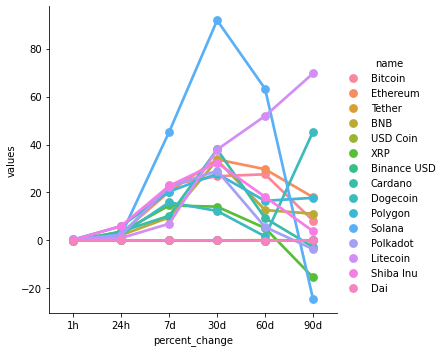

In [21]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [22]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,21178.90816,2023-01-16 06:26:37.971211
